In [77]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, 
    make_scorer, f1_score, precision_recall_fscore_support
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [87]:
df = pd.read_csv('sample_.csv', sep=';', on_bad_lines='skip')

In [88]:
print(df['TARGET'].isna().sum())
print(df.shape)

137027
(567391, 11)


In [ ]:
#PRODUCTTYPE, CHANNEL мб кредит не выдали

In [89]:
df.head()

,PARTNER,APPID,APPDATE,DOCSERNUM,MOBILEPHONE,EMAIL,LIM,PRODUCTTYPE,CHANNEL,MODEL,TARGET
0,PARTNER28,APPLICATID1015331,06JUL21:11:30:14,DOCSERNUM1,MOBILEPHONE43681,EMAIL158187,0.0,Другой тип кредита,Значение не передается,0,0.0
1,PARTNER6,APPLICATID503939,29JUL21:17:46:03,DOCSERNUM2,MOBILEPHONE407081,EMAIL143461,0.0,Другой тип кредита,Точка продаж,EMPTY,0.0
2,PARTNER6,APPLICATID503936,29JUL21:17:45:43,DOCSERNUM2,MOBILEPHONE407081,EMAIL143461,32374.1,"POS кредит (потребительский кредит, кредит на ...",Точка продаж,"15.6"" Ноутбук HP Laptop 15-gw0040ur (FHD/IPS) ...",0.0
3,PARTNER6,APPLICATID503947,29JUL21:17:51:07,DOCSERNUM2,MOBILEPHONE407081,EMAIL143461,30524.1,"POS кредит (потребительский кредит, кредит на ...",Точка продаж,"15.6"" Ноутбук HP Laptop 15s-eq1261ur (FHD/IPS)...",0.0
4,PARTNER6,APPLICATID503948,29JUL21:17:51:29,DOCSERNUM2,MOBILEPHONE407081,EMAIL143461,0.0,Другой тип кредита,Точка продаж,EMPTY,0.0


In [100]:
df['APPDATE'] = pd.to_datetime(df['APPDATE'], format = '%d%b%y:%H:%M:%S')
df.head()

,PARTNER,APPID,APPDATE,DOCSERNUM,MOBILEPHONE,EMAIL,LIM,PRODUCTTYPE,CHANNEL,MODEL,TARGET
0,PARTNER28,APPLICATID1015331,2021-07-06 11:30:14,DOCSERNUM1,MOBILEPHONE43681,EMAIL158187,0.0,Другой тип кредита,Значение не передается,0,0.0
1,PARTNER6,APPLICATID503939,2021-07-29 17:46:03,DOCSERNUM2,MOBILEPHONE407081,EMAIL143461,0.0,Другой тип кредита,Точка продаж,EMPTY,0.0
2,PARTNER6,APPLICATID503936,2021-07-29 17:45:43,DOCSERNUM2,MOBILEPHONE407081,EMAIL143461,32374.1,"POS кредит (потребительский кредит, кредит на ...",Точка продаж,"15.6"" Ноутбук HP Laptop 15-gw0040ur (FHD/IPS) ...",0.0
3,PARTNER6,APPLICATID503947,2021-07-29 17:51:07,DOCSERNUM2,MOBILEPHONE407081,EMAIL143461,30524.1,"POS кредит (потребительский кредит, кредит на ...",Точка продаж,"15.6"" Ноутбук HP Laptop 15s-eq1261ur (FHD/IPS)...",0.0
4,PARTNER6,APPLICATID503948,2021-07-29 17:51:29,DOCSERNUM2,MOBILEPHONE407081,EMAIL143461,0.0,Другой тип кредита,Точка продаж,EMPTY,0.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567391 entries, 0 to 567390
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   PARTNER      567391 non-null  object        
 1   APPID        567391 non-null  object        
 2   APPDATE      567391 non-null  datetime64[ns]
 3   DOCSERNUM    567391 non-null  object        
 4   MOBILEPHONE  567391 non-null  object        
 5   EMAIL        567391 non-null  object        
 6   LIM          567391 non-null  float64       
 7   PRODUCTTYPE  567391 non-null  object        
 8   CHANNEL      567391 non-null  object        
 9   MODEL        422661 non-null  object        
 10  TARGET       430364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 47.6+ MB


In [92]:
df.describe()

,LIM,TARGET
count,5.673910e+05,430364.000000
mean,1.768860e+05,0.019326
std,5.902204e+05,0.137667
min,0.000000e+00,0.000000
25%,1.228150e+04,0.000000
50%,4.024800e+04,0.000000
75%,9.900000e+04,0.000000
max,1.000000e+08,1.000000


In [7]:
def get_null_percent(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [8]:
get_null_percent(df)

,Total,Percent
MODEL,144730,0.255080
TARGET,137027,0.241504
PARTNER,0,0.000000
APPID,0,0.000000
APPDATE,0,0.000000
DOCSERNUM,0,0.000000
MOBILEPHONE,0,0.000000
EMAIL,0,0.000000
LIM,0,0.000000
PRODUCTTYPE,0,0.000000


In [101]:
#сразу же удалим записи с нулевой суммой кредита, кредит на 0 это как минимум странно
data = df.loc[df['LIM'] != 0]
get_null_percent(data)

,Total,Percent
MODEL,130954,0.274242
TARGET,114376,0.239525
PARTNER,0,0.000000
APPID,0,0.000000
APPDATE,0,0.000000
DOCSERNUM,0,0.000000
MOBILEPHONE,0,0.000000
EMAIL,0,0.000000
LIM,0,0.000000
PRODUCTTYPE,0,0.000000


In [102]:
#странный кредит на 100 лямов, возможно выброс
data.describe()

,LIM,TARGET
count,4.775120e+05,363136.000000
mean,2.101802e+05,0.018051
std,6.379123e+05,0.133136
min,1.500000e+02,0.000000
25%,2.461349e+04,0.000000
50%,5.000000e+04,0.000000
75%,1.100000e+05,0.000000
max,1.000000e+08,1.000000


In [108]:
#Выборка сильно несбалансированна
data['TARGET'].value_counts()

0.0    356581
1.0      6555
Name: TARGET, dtype: int64

In [109]:
#интересно посмотреть какие кредиты просрочены
data[data['TARGET'] == 1]

,PARTNER,APPID,APPDATE,DOCSERNUM,MOBILEPHONE,EMAIL,LIM,PRODUCTTYPE,CHANNEL,MODEL,TARGET
151,PARTNER32,APPLICATID961139,2021-05-08 18:41:57,DOCSERNUM70,MOBILEPHONE417071,EMAIL15980,10000.00,Микрозайм,Точка продаж,NaN,1.0
154,PARTNER28,APPLICATID1053217,2021-09-23 13:07:56,DOCSERNUM71,MOBILEPHONE382985,EMAIL158187,30000.00,"POS кредит (потребительский кредит, кредит на ...",Значение не передается,0,1.0
468,PARTNER40,APPLICATID92103,2021-12-20 12:07:04,DOCSERNUM201,MOBILEPHONE362613,EMAIL143461,340909.09,Неизвестный тип кредита,Отделение,EMPTY,1.0
511,PARTNER28,APPLICATID1006859,2022-03-04 11:59:53,DOCSERNUM218,MOBILEPHONE263329,EMAIL158187,100000.00,Кредит наличными (нецелевой),Значение не передается,0,1.0
577,PARTNER20,APPLICATID434669,2021-12-27 08:31:04,DOCSERNUM245,MOBILEPHONE382051,EMAIL158187,10999.00,"POS кредит (потребительский кредит, кредит на ...",Интернет,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
566276,PARTNER45,APPLICATID186297,2022-02-24 08:13:23,DOCSERNUM216197,MOBILEPHONE416560,EMAIL96388,8000.00,Микрозайм,Интернет,NaN,1.0
566279,PARTNER32,APPLICATID733379,2022-03-29 02:10:02,DOCSERNUM216197,MOBILEPHONE416560,EMAIL96388,10000.00,Микрозайм,Точка продаж,NaN,1.0
566552,PARTNER6,APPLICATID596940,2021-09-12 10:59:02,DOCSERNUM216318,MOBILEPHONE73897,EMAIL86124,46686.00,"POS кредит (потребительский кредит, кредит на ...",Точка продаж,Смартфон Apple iPhone XR 64GB Black (MH6M3RU/A),1.0
566713,PARTNER40,APPLICATID110517,2022-01-28 06:29:29,DOCSERNUM216371,MOBILEPHONE448909,EMAIL143461,10000.00,Неизвестный тип кредита,Отделение,EMPTY,1.0


In [111]:
data[data['TARGET'] == 1]['PRODUCTTYPE'].value_counts()

POS кредит (потребительский кредит, кредит на товар)         2426
Микрозайм                                                    2414
Кредит наличными (нецелевой)                                  684
Кредитная карта                                               552
Неизвестный тип кредита                                       287
Другой тип кредита                                             92
Кредит на автомобиль                                           86
Предварительная оценка заёмщика без указания типа кредита      10
Кредит на строительство недвижимости                            2
Ипотека                                                         1
Дебетовая карта с овердрафтом                                   1
Name: PRODUCTTYPE, dtype: int64

In [112]:
#ну наверное можно думать что вероятнее всего не вернут микрозайм
data[data['TARGET'] == 0]['PRODUCTTYPE'].value_counts()

POS кредит (потребительский кредит, кредит на товар)         200103
Неизвестный тип кредита                                       63246
Кредитная карта                                               33814
Кредит наличными (нецелевой)                                  25418
Кредит на автомобиль                                          21631
Микрозайм                                                      8063
Другой тип кредита                                             3200
Ипотека                                                         647
Предварительная оценка заёмщика без указания типа кредита       269
Дебетовая карта с овердрафтом                                   112
Кредит на строительство недвижимости                             78
Name: PRODUCTTYPE, dtype: int64

In [98]:
cat_columns = data.select_dtypes(['object']).columns

#перевод категориальных признаков
data[cat_columns] = data[cat_columns].apply ( lambda x: pd.factorize (x)[ 0 ])


In [31]:
def show_corr_matrix(df, figsize=(10, 10)):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, vmax=1., vmin=-1., annot=True, fmt='.2f', square=True)

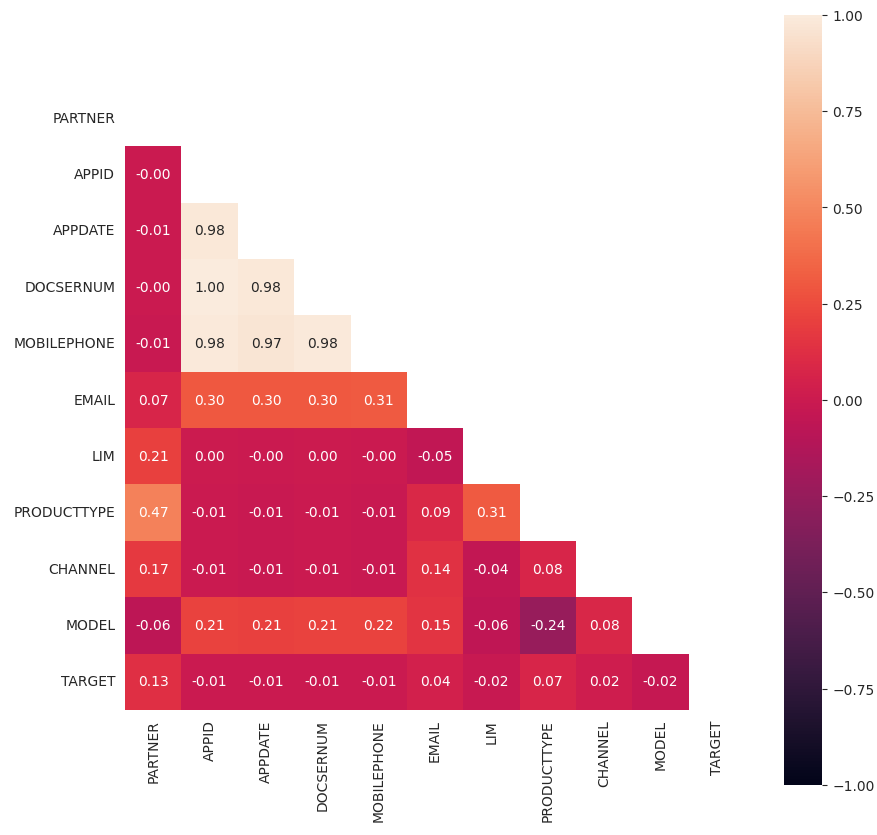

In [32]:
#нет явной корреляции между признаками и таргетом, не будем убирать коррелирующие признаки их и так мало
#номер заявки, мейл, телефон, наименование товара как будто вообще не несут информации
show_corr_matrix(data)

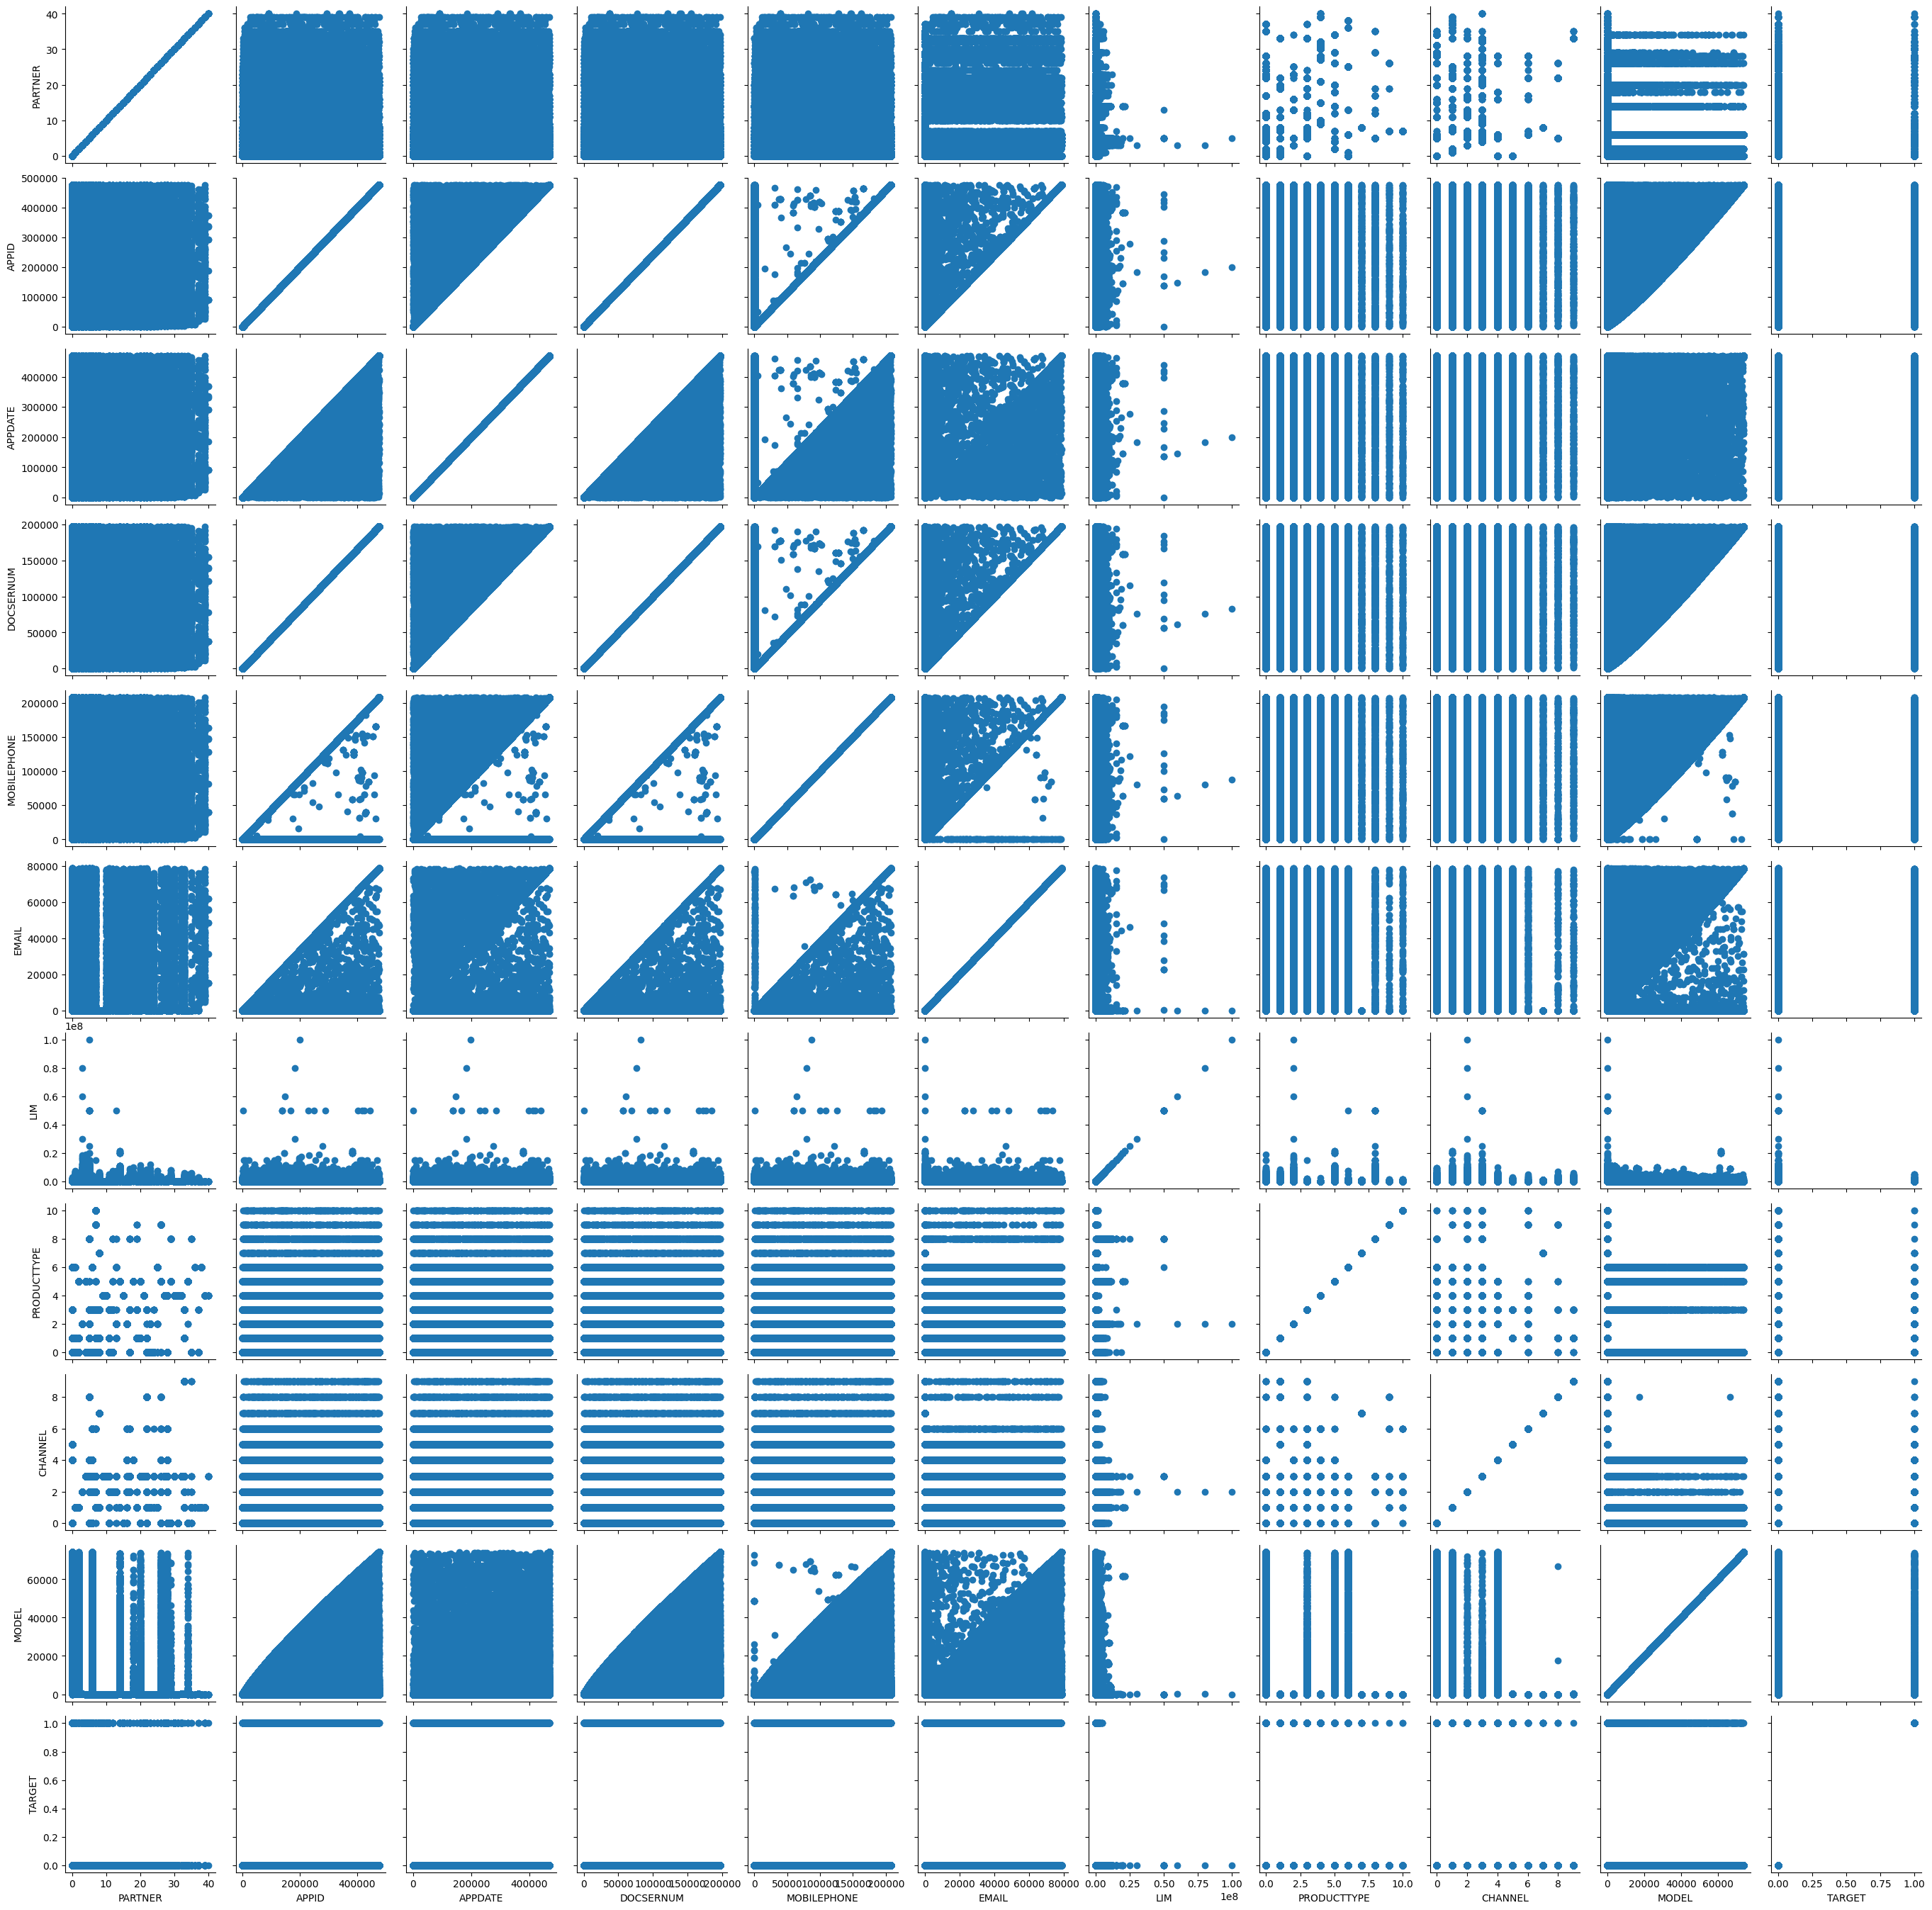

In [82]:
#Связи нелинейные лог регрессия не будет работать хорошо
pair_plot = sns.PairGrid(data)
pair_plot.map(plt.scatter)

In [33]:
def plot_graph(df, col, tagret_col, figsize=(12, 5), use_kde=True):
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    plt.xticks(rotation=90)
    sns.boxplot(data=df, y=col, x=tagret_col, ax=ax[0])
    sns.histplot(data=df,
                 x=col,
                 hue='TARGET',
                 kde=use_kde,
                 stat='density',
                 common_norm=False,
                 palette="tab10",
                 ax=ax[1])
    plt.show()

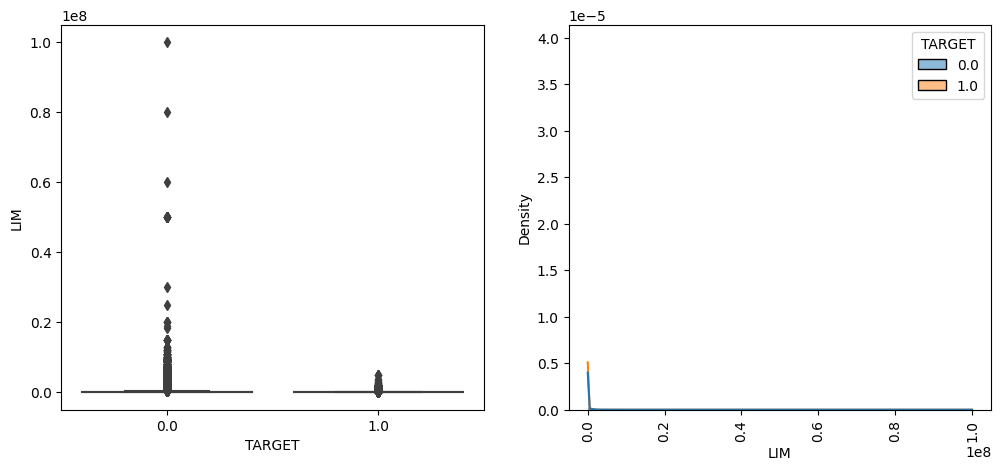

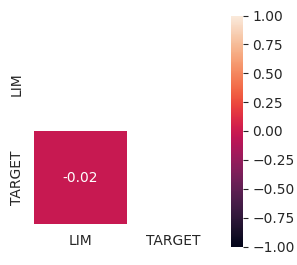

In [34]:
#кошмарное распределение
plot_graph(data, 'LIM', 'TARGET')
show_corr_matrix(data[['LIM', 'TARGET']], figsize=(3, 3))

In [37]:
def find_outlier(data, col, extreme_values=False):
    Q1 = np.percentile(data[col], 25, interpolation='midpoint')
    Q3 = np.percentile(data[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    coef = 3. if extreme_values else 1.5        
    low_lim = Q1 - coef * IQR
    up_lim = Q3 + coef * IQR

    return low_lim, up_lim

In [41]:
#Попробуем для поиска выбросов применить правило межквартильного размаха. Применим квантиль, например, 1%
low_lim, up_lim = find_outlier(data, 'LIM', extreme_values=False)
print(f'low_lim = {low_lim}')
low_lim = data['LIM'].quantile(0.01)
print(f'low_lim = {low_lim}')
print(f'up_lim = {up_lim}')
print(data[data['LIM'] < low_lim].shape[0])
print(data[data['LIM'] > up_lim].shape[0])
print(data.shape)
#почти 1/5 датасета выбросы? 0_о

low_lim = -103466.675
low_lim = 3000.0
up_lim = 238080.005
2321
73945
(477512, 11)


C:\Users\dmoro\AppData\Local\Temp\ipykernel_5432\2075844306.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data[col], 25, interpolation='midpoint')
C:\Users\dmoro\AppData\Local\Temp\ipykernel_5432\2075844306.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data[col], 75, interpolation='midpoint')


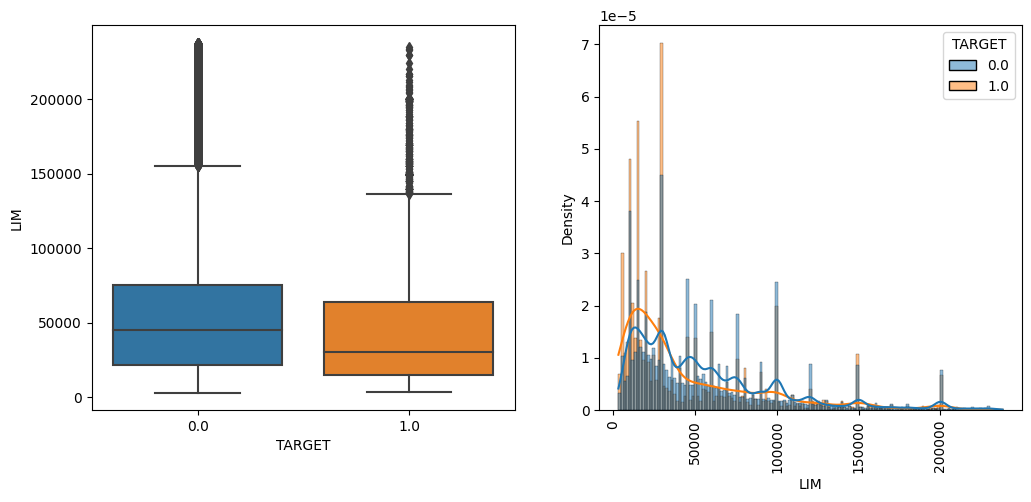

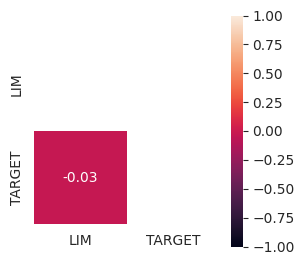

In [39]:
plot_graph(data[(data['LIM'] > low_lim) &
                    (data['LIM'] < up_lim)],
           'LIM',
           'TARGET')
show_corr_matrix(data[(data['LIM'] > low_lim) &
                          (data['LIM'] < up_lim)]
                 [['LIM', 'TARGET']],
                 figsize=(3, 3))

In [61]:
new_df = data[(data['LIM'] > low_lim) & (data['LIM'] < up_lim)]
new_df.shape

(398726, 11)

In [62]:
#удалим пропуски в таргете
new_df = new_df.dropna(subset=['TARGET'])
new_df

,PARTNER,APPID,APPDATE,DOCSERNUM,MOBILEPHONE,EMAIL,LIM,PRODUCTTYPE,CHANNEL,MODEL,TARGET
2,0,0,0,0,0,0,32374.1,0,0,0,0.0
3,0,1,1,0,0,0,30524.1,0,0,1,0.0
6,1,3,3,2,2,1,80000.0,1,1,2,0.0
7,2,4,4,3,3,0,200241.0,0,1,3,0.0
9,0,6,6,4,4,2,86780.0,0,0,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
567381,0,477506,469810,197065,207695,0,76594.0,0,0,74145,0.0
567383,0,477507,469811,197065,207695,0,90000.0,3,0,4,0.0
567385,4,477508,469812,197065,207695,1,42398.0,0,3,-1,0.0
567388,1,477510,469814,197067,207697,1,45000.0,0,1,2,0.0


In [65]:
X = new_df.drop('TARGET', axis=1)
y = new_df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [70]:
def plot_classification_report(y_tru, y_prd, figsize=(3, 3), ax=None):
    plt.figure(figsize=figsize)
    xticks = ['precision', 'recall', 'f1-score']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']
    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)[:-1]).T
    avg = np.mean(rep, axis=0)
    rep = np.insert(rep, rep.shape[0], avg, axis=0)
    sns.heatmap(rep,
                annot=True,
                cbar=False,
                xticklabels=xticks,
                yticklabels=yticks,
                ax=ax)
    plt.show()

def get_metrics(y_train, train_pred_y, y_test, test_pred_y):
    print(f'train:')
    plot_classification_report(y_train, train_pred_y)
    cm = confusion_matrix(y_train, train_pred_y)
    print(f'Confusion matrix:\n{cm}', end='\n\n')
    print(f'test:')
    plot_classification_report(y_test, test_pred_y)
    cm = confusion_matrix(y_test, test_pred_y)
    print(f'Confusion matrix:\n{cm}', end='\n\n')



XGBClassifier

Fitting 5 folds for each of 48 candidates, totalling 240 fits
best_score = 0.6239884100158013
best_params = {'colsample_bytree': 1.0, 'max_depth': 5, 'n_estimators': 300}
train:


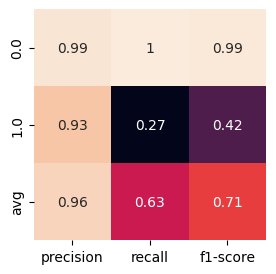

Confusion matrix:
[[206960     90]
 [  3028   1122]]

test:


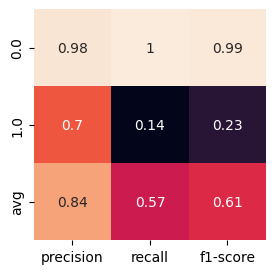

Confusion matrix:
[[88602   110]
 [ 1552   251]]



In [71]:

clf = xgb.XGBClassifier(objective='binary:logistic')
cv = StratifiedKFold(n_splits=5, random_state=43, shuffle=True)
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth':[2, 3, 4, 5],
    'colsample_bytree': [0.6, 0.8, 1.]
}
gs = GridSearchCV(
    clf,
    param_grid=param_grid,
    verbose=10,
    scoring=make_scorer(f1_score, average='macro'),
    cv=cv,
    n_jobs=-1
)
gs.fit(X_train, y_train)

print(f'best_score = {gs.best_score_}')
print(f'best_params = {gs.best_params_}')

model = gs.best_estimator_
model.fit(X_train, y_train)

train_pred_y = model.predict(X_train)
test_pred_y = model.predict(X_test)
get_metrics(y_train, train_pred_y, y_test, test_pred_y)

Лес

Fitting 5 folds for each of 72 candidates, totalling 360 fits
best_score = 0.5814553623092231
best_params = {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 500}
train:


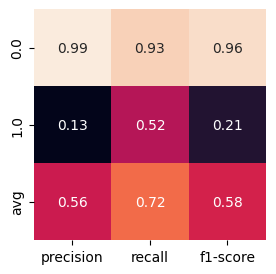

Confusion matrix:
[[192644  14406]
 [  2010   2140]]

test:


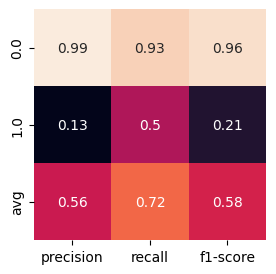

Confusion matrix:
[[82669  6043]
 [  900   903]]



In [76]:
clf = RandomForestClassifier(class_weight='balanced')
cv = StratifiedKFold(n_splits=5, random_state=43, shuffle=True)
param_grid = {
    'n_estimators': [5, 10, 20, 50, 100, 200, 300, 400, 500],
    'criterion':['gini','entropy'],
    'max_depth':[2, 3, 4, 5]
}
gs = GridSearchCV(
    clf,
    param_grid=param_grid,
    verbose=10,
    scoring=make_scorer(f1_score, average='macro'),
    cv=cv,
    n_jobs=-1
)
gs.fit(X_train, y_train)

print(f'best_score = {gs.best_score_}')
print(f'best_params = {gs.best_params_}')

model = gs.best_estimator_
model.fit(X_train, y_train)

train_pred_y = model.predict(X_train)
test_pred_y = model.predict(X_test)
get_metrics(y_train, train_pred_y, y_test, test_pred_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\dmoro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


best_score = 0.4492839207829194
best_params = {'C': 0.9, 'max_iter': 100}


c:\Users\dmoro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train:


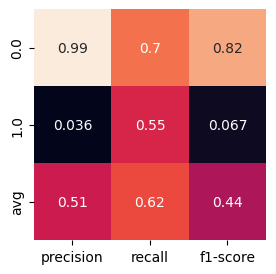

Confusion matrix:
[[145752  61298]
 [  1886   2264]]

test:


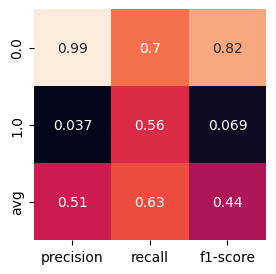

Confusion matrix:
[[62292 26420]
 [  791  1012]]



In [78]:
clf = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=5, random_state=43, shuffle=True)
param_grid = {
    'max_iter' : [100, 200, 300],
    'C' : [0.5, 0.7, 0.9, 1.1]
}
gs = GridSearchCV(
    clf,
    param_grid=param_grid,
    verbose=10,
    scoring=make_scorer(f1_score, average='macro'),
    cv=cv,
    n_jobs=-1
)
gs.fit(X_train, y_train)

print(f'best_score = {gs.best_score_}')
print(f'best_params = {gs.best_params_}')

model = gs.best_estimator_
model.fit(X_train, y_train)

train_pred_y = model.predict(X_train)
test_pred_y = model.predict(X_test)
get_metrics(y_train, train_pred_y, y_test, test_pred_y)